In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

### Task 1

In [298]:
labels = [
    "CheckingAccount", "Duration(Months)", "CreditHistory", "Purpose", "CreditAmount", "SavingsAccount/Bonds", "PresentEmploymentSince", "InstallmentRate(DisposableIncome)",
    "PersonalStatusAndSex", "OtherDebtor/Gurantors", "PresentResidentSince", "Property", "Age(Years)", "OtherInstallmentPlans", "Housing", "ExistingCredits", "Job",
    "No.ofPeopleLiableToProvideMaintenanceFor", "Telephone", "ForeignWorker", "CreditRisk"
]

df = pd.read_csv("german.data", sep=" ", names=labels)

isAllLoaded = df.shape[0] == 1000 and df.shape[1] == 21  
print("Is all data loaded: " + str(isAllLoaded))

#Checking for duplicates
df.duplicated().any()

# Checking for missing values
df.isna().sum().any()
df.isnull().sum()

# Checking dtypes to ensure correct data types are assigned to the cols
df.dtypes

# Filtering all categorical columns
cat_columns = df.select_dtypes(include=['object'])

# creating instance of labelencoder
labelEncoder = LabelEncoder()
formatted_df = df.copy()

for col in cat_columns:
    formatted_df[col] = labelEncoder.fit_transform(formatted_df[col])

# categorizing the creditRisk from 1,2 to 0,1
formatted_df["CreditRisk"] = labelEncoder.fit_transform(formatted_df["CreditRisk"])

# Printing preprocessed dataframe
formatted_df

Is all data loaded: True


,CheckingAccount,Duration(Months),CreditHistory,Purpose,CreditAmount,SavingsAccount/Bonds,PresentEmploymentSince,InstallmentRate(DisposableIncome),PersonalStatusAndSex,OtherDebtor/Gurantors,...,Property,Age(Years),OtherInstallmentPlans,Housing,ExistingCredits,Job,No.ofPeopleLiableToProvideMaintenanceFor,Telephone,ForeignWorker,CreditRisk
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,0
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,1
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,0
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,3,1736,0,3,3,1,0,...,0,31,2,1,1,1,1,0,0,0
996,0,30,2,1,3857,0,2,4,0,0,...,1,40,2,1,1,3,1,1,0,0
997,3,12,2,4,804,0,4,4,2,0,...,2,38,2,1,1,2,1,0,0,0
998,0,45,2,4,1845,0,2,4,2,0,...,3,23,2,2,1,2,1,1,0,1


### 2. Specify th learning type of the problem.

##### This is a supervised learning classification problem. Dataset comes with class label values that we want to predict. It already consist of labeled data that we can use to predict unlabeled data.

#### 3. Three leaning algorithms and proposed hyperparameters
##### GaussianNB()
##### LogisticRegression() - C=[1,10,20,30], penalty='l2, l2', solver='liblinear, saga'
##### KNeighborsClassifier() - n_neighbours (5,6,7,8,9,10)

In [315]:
# Removing class label and selecting only the class label for splitting data 
X = formatted_df.drop(["CreditRisk"], axis=1)
y = formatted_df["CreditRisk"]

# Splitting dataframe into train data and test data. 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Printing train data
X_train

,CheckingAccount,Duration(Months),CreditHistory,Purpose,CreditAmount,SavingsAccount/Bonds,PresentEmploymentSince,InstallmentRate(DisposableIncome),PersonalStatusAndSex,OtherDebtor/Gurantors,PresentResidentSince,Property,Age(Years),OtherInstallmentPlans,Housing,ExistingCredits,Job,No.ofPeopleLiableToProvideMaintenanceFor,Telephone,ForeignWorker
382,3,22,2,0,1283,4,3,4,1,0,4,1,25,2,0,1,2,1,0,0
994,3,12,2,0,2390,4,4,4,2,0,3,2,50,2,1,1,2,1,1,0
982,2,21,2,0,2923,1,2,1,1,0,1,2,28,0,1,1,3,1,1,0
47,0,6,2,1,1352,2,0,1,1,0,2,1,23,2,0,1,0,1,1,0
521,0,18,2,4,3190,0,2,2,1,0,2,0,24,2,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,3,10,2,1,2901,4,1,1,1,0,4,0,31,2,0,1,2,1,0,0
72,0,8,4,2,1164,0,4,3,2,0,4,3,51,0,2,2,3,2,1,0
908,3,15,3,1,3594,0,1,1,1,0,2,1,46,2,1,2,1,1,0,0
235,0,24,2,4,1823,0,0,4,2,0,2,2,30,1,1,1,3,2,0,0


In [300]:
# Printing test data partition
y_test

507    1
818    0
452    0
368    1
242    1
      ..
430    0
874    0
550    0
608    0
207    0
Name: CreditRisk, Length: 200, dtype: int64

##### Finding the best hyperparameter for KNeighborsClassifier


In [312]:
#Proposing values between 5 and 11 for the hyperparameter n_neighbours (5,6,7,8,9,10)
n_neighbours = range(5, 11)
for n in n_neighbours:
    print(n)

# Cross validating all the possibilities with 5 stratifiedKFolds 
cv_scores = []
for n in n_neighbours:
    dt = KNeighborsClassifier(n_neighbors= n)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

print('cv scores: ', cv_scores)

# Getting the max mean score and getting the index of the array and showing the value
bestNeighbour = n_neighbours[np.argmax(cv_scores)]
print('best value: ', bestNeighbour)

5
6
7
8
9
10
cv scores:  [0.67, 0.6875, 0.6849999999999999, 0.6875, 0.6837500000000001, 0.6849999999999999]
best value:  6


##### Above is the behind logic of deciding the hyperparameter value for n_neighbours for KNeighborsClassifier. The result was 6 out of the six proposed models. Below is the module from sklearn to find perform the hyperparameter tuning. Both the values are equal if yor compare.

In [313]:
# Selected 3 learning algorithms with possible hyperparameters
modelParams = {
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1, 10, 20, 30],
            'solver': ['liblinear'],
            'penalty': ['l1', 'l2']
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors' : n_neighbours # using the same value used in the above method to compare
        }
    }  
}

scores = []
detailedScores = []

# Hyperparameter tuning using GridSearchCV
for modelName, mp in modelParams.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': modelName,
        'BestParams': clf.best_params_,
        'BestScore': clf.best_score_
    })

    # To check all the results
    detailedScores.append(clf.cv_results_)
    
# Hyperparameter details for each model
df = pd.DataFrame(scores, columns=['model','BestParams', 'BestScore'])
df

,model,BestParams,BestScore
0,logistic_regression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.760
1,naive_bayes_gaussian,{},0.732
2,KNN,{'n_neighbors': 6},0.681


### Model Development

In [317]:
# Defining n-fold for cross validations
skf = StratifiedKFold(n_splits=4)

# Performing cross validations for selected learning algorithms
cv1 = cross_val_score(LogisticRegression(C=1, penalty='l2', solver='liblinear'), X_train, y_train, cv=skf)
cv2 = cross_val_score(GaussianNB(), X_train, y_train, cv=skf)
cv3 = cross_val_score(KNeighborsClassifier(n_neighbors=bestNeighbour), X_train, y_train, cv=skf)

# Printing cross value mean for each modle
print('LogisticRegression mean P:', cv1.mean())
print('GaussianNB mean P:', cv2.mean())
print('KNeighborsClassifier mean P:', cv3.mean())

print("\nSelected model: LogisticRegression(C=1, penalty='l2', solver='liblinear')")

LogisticRegression mean P: 0.755
GaussianNB mean P: 0.7262500000000001
KNeighborsClassifier mean P: 0.68375

Selected model: LogisticRegression(C=1, penalty='l2', solver='liblinear')


In [304]:
# Choosing LogisticRegression since this learning module has the best mean score from corss validation for 4 folds
lrModel = LogisticRegression(C=1, penalty='l2', solver='liblinear')
lrModel.fit(X_train, y_train)
pred = lrModel.predict(X_test)

# Adding predicted value to test dataframe
new_X_test = X_test.copy()
new_X_test['Predicted'] = pred
new_X_test

,CheckingAccount,Duration(Months),CreditHistory,Purpose,CreditAmount,SavingsAccount/Bonds,PresentEmploymentSince,InstallmentRate(DisposableIncome),PersonalStatusAndSex,OtherDebtor/Gurantors,...,Property,Age(Years),OtherInstallmentPlans,Housing,ExistingCredits,Job,No.ofPeopleLiableToProvideMaintenanceFor,Telephone,ForeignWorker,Predicted
507,1,15,1,0,6850,1,0,1,2,0,...,1,34,2,1,1,3,2,1,0,0
818,0,36,2,2,15857,0,0,2,0,1,...,2,43,2,1,1,3,1,0,0,1
452,3,12,0,3,2759,0,4,2,2,0,...,1,34,2,1,2,2,1,0,0,0
368,0,36,2,3,3446,0,4,4,2,0,...,2,42,2,1,1,2,2,0,0,1
242,0,48,0,1,4605,0,4,3,2,0,...,3,24,2,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,3,5,2,9,3448,0,3,1,2,0,...,0,74,2,1,1,1,1,0,0,0
874,0,12,2,3,3590,0,2,2,2,1,...,1,29,2,1,1,1,2,0,0,0
550,3,12,4,6,996,4,3,4,1,0,...,0,23,2,1,2,2,1,0,0,0
608,3,18,2,4,2051,0,1,4,2,0,...,0,33,2,1,1,2,1,0,0,0


In [310]:
# Accuracy score
accuracyScore = accuracy_score(pred, y_test)
accuracyScore

0.77

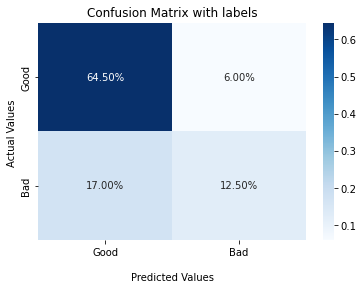

In [309]:
# Confusion matrix
confusionMatrix = confusion_matrix(y_test, pred)

cm = sns.heatmap(confusionMatrix/np.sum(confusionMatrix), annot=True, fmt='.2%', cmap='Blues')
cm.set_title('Confusion Matrix with labels');
cm.set_xlabel('\nPredicted Values')
cm.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
cm.xaxis.set_ticklabels(['Good','Bad'])
cm.yaxis.set_ticklabels(['Good','Bad'])

## Display the visualization of the Confusion Matrix.
plt.show()